# Tuberculose A15 Fevereiro 2023 EDA

### Importing Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

### Reading the file for 03/2023

In [2]:
# Specify the folder path where your .xls files are located
file_path = 'tuber_states_022023.xls'

# Read the file into a DataFrame without headers, assuming the data starts from the first row
df = pd.read_excel(file_path, header=None, engine='xlrd')

# Directly assign the desired column names
df.columns = ["Procedimentos realizados", 
              "RO", 
              "AM",
              "PA",
              "AP",
              "TO",
              "MA",
              "PI",
              "CE", 
              "PB",
              "PE",
              "AL",
              "SE",
              "BA",
              "MG",
              "ES",
              "RJ",
              "SP",
              "PR",
              "SC",
              "RS",
              "MS",
              "MT",
              "GO",
              "DF",
              "Total"
             ]

# Drop the first two lines of data after the headers have been set
df = df.drop(index=[1])

# Reset the index to make sure it starts from 0 after dropping rows
df.reset_index(drop=True, inplace=True)

# Creating DataFrames from the sample data
tuber_states_022023_df = pd.DataFrame(df)

# AC, RR, RN

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [3]:
tuber_states_022023_df.head()

,Procedimentos realizados,RO,AM,PA,AP,TO,MA,PI,CE,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,Produção Ambulatorial_de Procedimentos da Tab...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Procedimentos realizados,RO,AM,PA,AP,TO,MA,PI,CE,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
2,0201010402 BIOPSIA DE PLEURA (POR ASPIRACAO/AG...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,4
3,0202010120 DOSAGEM DE ACIDO URICO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0202010201 DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,4


### Removing the Row and Rename the States

In [4]:
# Remove the specified row
tuber_states_022023_df_cleaned = tuber_states_022023_df.drop(index=0)

# Adding states AC, RR, and RN with zeros for all row values
# We will create a dictionary with these states as keys and a list of zeros as values for each state
# The length of the list will be the same as the number of rows in the dataframe
new_states = {'AC': [0] * len(tuber_states_022023_df_cleaned), 'RR': [0] * len(tuber_states_022023_df_cleaned), 'RN': [0] * len(tuber_states_022023_df_cleaned)}

# Convert this dictionary to a DataFrame and join it with the existing dataframe
df_new_states = pd.DataFrame(new_states)
df_updated = pd.concat([tuber_states_022023_df_cleaned.reset_index(drop=True), df_new_states], axis=1)

# Convert the state abbreviations to full names
# Dictionary of Brazilian state abbreviations to full names
state_names = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas',
    'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo',
    'GO': 'Goiás', 'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais', 'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná',
    'PE': 'Pernambuco', 'PI': 'Piauí', 'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul', 'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina',
    'SP': 'São Paulo', 'SE': 'Sergipe', 'TO': 'Tocantins'
}

# Renaming the columns using the dictionary
tuber_states_022023_df = df_updated.rename(columns=state_names)

tuber_states_022023_df = tuber_states_022023_df.drop(index=0).reset_index(drop=True)

tuber_states_022023_df.head()

,Procedimentos realizados,Rondônia,Amazonas,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal,Total,Acre,Roraima,Rio Grande do Norte
0,0201010402 BIOPSIA DE PLEURA (POR ASPIRACAO/AG...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,4,0,0,0
1,0202010120 DOSAGEM DE ACIDO URICO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0202010201 DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,4,0,0,0
3,0202010228 DOSAGEM DE CALCIO IONIZAVEL,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0202010260 DOSAGEM DE CLORETO,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Sorting by state name

In [5]:
# Excluding 'Procedimentos realizados' and 'Total' from the sorting operation
fixed_columns = ['Procedimentos realizados', 'Total']
state_columns_sorted = sorted([col for col in tuber_states_022023_df.columns if col not in fixed_columns])

# Reconstruct the dataframe with fixed columns followed by sorted state columns
df_sorted_correctly = tuber_states_022023_df[fixed_columns + state_columns_sorted]

df_sorted_correctly.head()

,Procedimentos realizados,Total,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,0201010402 BIOPSIA DE PLEURA (POR ASPIRACAO/AG...,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,0202010120 DOSAGEM DE ACIDO URICO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0202010201 DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,0202010228 DOSAGEM DE CALCIO IONIZAVEL,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0202010260 DOSAGEM DE CLORETO,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Rename the df

In [6]:
tuber_states_022023_df = df_sorted_correctly.copy()

# Displaying the first few rows to confirm the renaming and the data structure
tuber_states_022023_df.head()

,Procedimentos realizados,Total,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,0201010402 BIOPSIA DE PLEURA (POR ASPIRACAO/AG...,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,0202010120 DOSAGEM DE ACIDO URICO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0202010201 DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,0202010228 DOSAGEM DE CALCIO IONIZAVEL,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0202010260 DOSAGEM DE CLORETO,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Separete the code from the description

In [7]:
tuber_states_022023_df[['Code', 'Description']] = tuber_states_022023_df['Procedimentos realizados'].str.split(pat=" ", n=1, expand=True)

# Now that we've created 'Code' and 'Description', we can drop the original 'Procedimentos realizados' column
tuber_states_022023_df = tuber_states_022023_df.drop('Procedimentos realizados', axis=1)

# Reordering the dataframe columns to place 'Code' and 'Description' at the beginning
column_order = ['Code', 'Description'] + [col for col in tuber_states_022023_df.columns if col not in ['Code', 'Description']]
tuber_states_022023_df = tuber_states_022023_df[column_order]

tuber_states_022023_df.head()

,Code,Description,Total,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,0201010402,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,0202010120,DOSAGEM DE ACIDO URICO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0202010201,DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,0202010228,DOSAGEM DE CALCIO IONIZAVEL,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0202010260,DOSAGEM DE CLORETO,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Drop the Total and NaN rows

In [8]:
# Drop the "Total" column from the dataframe

# Checking for any row named "Total" in the "Description" column
total_row_index = tuber_states_022023_df[tuber_states_022023_df["Description"].str.contains("Total", case=False, na=False)].index

# Drop rows with "Total" in the "Description" column
df_modified_cleaned = tuber_states_022023_df.drop(index=total_row_index)

# Drop rows with NaN values across the entire dataframe
df_modified_cleaned = tuber_states_022023_df.dropna()

tuber_states_022023_df = df_modified_cleaned.copy()

tuber_states_022023_df = tuber_states_022023_df.drop('Total', axis=1)

tuber_states_022023_df.head()

,Code,Description,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,0201010402,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,0202010120,DOSAGEM DE ACIDO URICO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0202010201,DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,0202010228,DOSAGEM DE CALCIO IONIZAVEL,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0202010260,DOSAGEM DE CLORETO,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Getting the procedure with most frequency for each state

In [9]:
state_names = [
    "Acre", "Alagoas", "Amazonas", "Amapá", "Bahia", "Ceará", "Distrito Federal",
    "Espírito Santo", "Goiás", "Maranhão", "Minas Gerais", "Mato Grosso do Sul", "Mato Grosso",
    "Pará", "Paraíba", "Pernambuco", "Piauí", "Paraná", "Rio de Janeiro",
    "Rio Grande do Norte", "Rondônia", "Roraima", "Rio Grande do Sul", "Santa Catarina",
    "São Paulo", "Sergipe", "Tocantins"
]

max_value_state = {}

for state in state_names:
    max_value = {}
    index = tuber_states_022023_df[state].idxmax()
    max_value['Code'] = tuber_states_022023_df['Code'][index]
    max_value['Description'] = tuber_states_022023_df['Description'][index]
    max_value['Frequência'] = tuber_states_022023_df[state][index]
    max_value_state[state] = max_value

max_value_state = pd.DataFrame(max_value_state)
max_value_state.head()

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
Code,0201010402,0214010163,0206020031,0206020031,0803010125,0301010072,0205020160,0412050170,0301060061,0301060118,0301010072,0301060096,0206020031,0803010125,0206020031,0412030128,0206020031,0301010072,0301010072,0201010402,0301010072,0201010402,0301100012,0202090361,0202090361,0206020031,0301060096
Description,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,TESTE RAPIDO PARA DETECCAO DE SARS-COVID-2,TOMOGRAFIA COMPUTADORIZADA DE TORAX,TOMOGRAFIA COMPUTADORIZADA DE TORAX,UNIDADE DE REMUNERACAO PARA DESLOCAMENTO DE PA...,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,ULTRASSONOGRAFIA PELVICA (GINECOLOGICA),TORACOCENTESE/DRENAGEM DE PLEURA,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,ACOLHIMENTO COM CLASSIFICACAO DE RISCO,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,TOMOGRAFIA COMPUTADORIZADA DE TORAX,UNIDADE DE REMUNERACAO PARA DESLOCAMENTO DE PA...,TOMOGRAFIA COMPUTADORIZADA DE TORAX,RETIRADA DE DRENO TUBULAR TORACICO,TOMOGRAFIA COMPUTADORIZADA DE TORAX,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,ADMINISTRACAO DE MEDICAMENTOS NA ATENCAO ESPEC...,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,TOMOGRAFIA COMPUTADORIZADA DE TORAX,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...
Frequência,0,1,7,10,42,13,1,2,11,3,56,4,11,42,2,30,2,3,102,0,13,0,10,621,359,1,1


### Brazil's map for Tuberculose A15 based on the data from 02/2023

In [10]:
# Select only the state columns for summing
state_columns = tuber_states_022023_df.columns[2:]

# Sum the values for each state
state_totals = tuber_states_022023_df[state_columns].sum()

# Create a new dataframe with the sums
total_procedures_df = pd.DataFrame(state_totals, columns=["Total Procedures"]).reset_index()
total_procedures_df.rename(columns={"index": "State"}, inplace=True)

total_procedures_df.head()

,State,Total Procedures
0,Acre,0
1,Alagoas,2
2,Amapá,10
3,Amazonas,10
4,Bahia,121


In [11]:
total_procedures_df.to_csv('tuberculose_022023_total_state.csv', index=False)

In [12]:
# Brazil's map Data Wragling

# Read the shapefile data
uf_br = gpd.read_file('map/gadm36_BRA_1.shp')
uf_br_geo = uf_br[['NAME_1', 'geometry']]

# Rename the column to merge the dataset
uf_br_geo.rename(columns={'NAME_1': 'State'}, inplace=True)

# Merge the population data with the GeoDataFrame
merged_df = uf_br_geo.merge(total_procedures_df, on='State')

C:\Users\digui\anaconda3\Lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\digui\AppData\Local\Temp\ipykernel_19760\2156939146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uf_br_geo.rename(columns={'NAME_1': 'State'}, inplace=True)


In [13]:
merged_df.head()

,State,geometry,Total Procedures
0,Acre,"POLYGON ((-68.10553 -10.72192, -68.10547 -10.7...",0
1,Alagoas,"MULTIPOLYGON (((-35.88986 -9.84431, -35.88986 ...",2
2,Amapá,"MULTIPOLYGON (((-50.82570 2.52208, -50.82570 2...",10
3,Amazonas,"POLYGON ((-58.13699 -7.35614, -58.13682 -7.356...",10
4,Bahia,"MULTIPOLYGON (((-38.69208 -17.95958, -38.69208...",121


C:\Users\digui\anaconda3\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


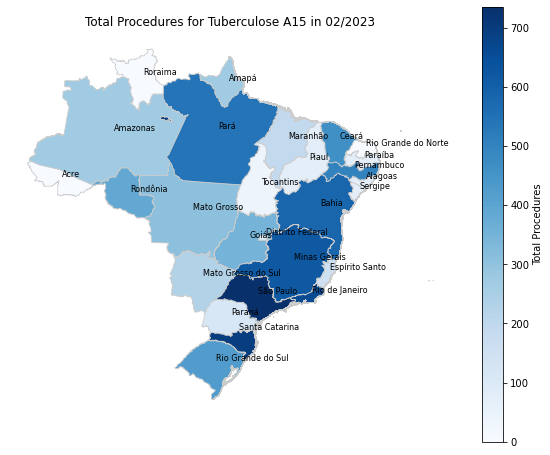

In [14]:
# Iterate through each column (excluding non-numeric columns)
for column in merged_df.columns:
    if column not in ['State', 'geometry']:
        # Normalize population values between 0 and 1 for coloring
        col_min = merged_df[column].min()
        col_max = merged_df[column].max()
        norm = Normalize(vmin=col_min, vmax=col_max)

        # Create a scalar mappable to apply colormap to the map
        sm = ScalarMappable(cmap='Blues', norm=norm)
        sm.set_array([])  # dummy array for the scalar mappable

        # Plot the map with the colored regions
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        merged_df.plot(column=column, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
        ax.set_title(f'{column} for Tuberculose A15 in 02/2023')
        ax.set_axis_off()
        
        # Loop through the rows of the DataFrame to annotate state abbreviations
        for idx, row in merged_df.iterrows():
            state_abbr = row['State']  
            state_geometry = row['geometry'] 
            
            # Get the centroid of the state geometry
            centroid = state_geometry.centroid
            
            # Annotate the abbreviation at the centroid
            ax.annotate(text=state_abbr, xy=(centroid.x, centroid.y), xytext=(3, 3),
                        textcoords="offset points", color='black', fontsize=8)


        # Create colorbar
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label(column)

        # Save or show the map
        plt.savefig(f'{column}_022023_map.png')  # Save the figure as an image
        plt.show()  # Display the figure

### Saving as a csv file

In [15]:
tuber_states_022023_df.to_csv('tuber_states_022023_df.csv', index=False)

tuber_states_022023_df.head()

,Code,Description,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,0201010402,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,0202010120,DOSAGEM DE ACIDO URICO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0202010201,DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,0202010228,DOSAGEM DE CALCIO IONIZAVEL,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0202010260,DOSAGEM DE CLORETO,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
